Automatically created module for IPython interactive environment
Cluster 1: Apple, Amazon, Yahoo
Cluster 2: Comcast, Cablevision, Time Warner
Cluster 3: ConocoPhillips, Chevron, Total, Valero Energy, Exxon
Cluster 4: Cisco, Dell, HP, IBM, Microsoft, SAP, Texas Instruments
Cluster 5: Boeing, General Dynamics, Northrop Grumman, Raytheon
Cluster 6: AIG, American express, Bank of America, Caterpillar, CVS, DuPont de Nemours, Ford, General Electrics, Goldman Sachs, Home Depot, JPMorgan Chase, Marriott, 3M, Ryder, Wells Fargo, Wal-Mart
Cluster 7: McDonald's
Cluster 8: GlaxoSmithKline, Novartis, Pfizer, Sanofi-Aventis, Unilever
Cluster 9: Kellogg, Coca Cola, Pepsi
Cluster 10: Colgate-Palmolive, Kimberly-Clark, Procter Gamble
Cluster 11: Canon, Honda, Navistar, Sony, Toyota, Xerox


Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

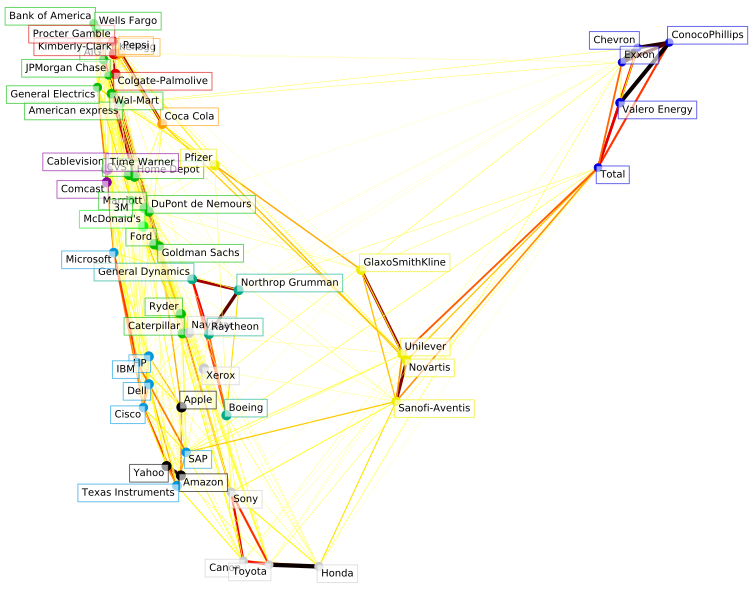

In [3]:
import  sys

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn import cluster,covariance,manifold

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

print(__doc__)

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    # 'BABA':'Alibaba',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}


symbols,names=np.array(sorted(symbol_dict.items())).T
quotes=[]

for symbol in symbols:
    print('Fetching quote history for %r' %symbol,file=sys.stderr)
    url=('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))

close_prices=np.vstack([q['close'] for q in quotes])
open_prices=np.vstack(q['open'] for q in quotes)



variation=close_prices-open_prices

edge_model=covariance.GraphicalLassoCV(cv=5)

X=variation.copy().T
X /=X.std(axis=0)
edge_model.fit(X)




# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
_,labels=cluster.affinity_propagation(edge_model.covariance_)
n_labels=labels.max()

for i in range(n_labels+1):
    print('Cluster %i: %s'%((i+1),', '.join(names[labels==i])))

#Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.

node_position_model=manifold.LocallyLinearEmbedding(n_components=2,eigen_solver='dense',n_neighbors=6)
embedding=node_position_model.fit_transform(X.T).T

# Visualization
plt.figure(1,facecolor='w',figsize=(10,8))
plt.clf()
ax=plt.axes([0.,0.,1.,1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations=edge_model.precision_.copy()
d=1/np.sqrt(np.diag(partial_correlations))
partial_correlations *=d
partial_correlations *=d[:,np.newaxis]
non_zero=(np.abs(np.triu(partial_correlations,k=1))>0.02)



# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0],embedding[1],s=100*d**2,c=labels,cmap=plt.cm.nipy_spectral)



# Plot the edges

start_idx,end_idx=np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments=[[embedding[:,start],embedding[:,stop]] for start,stop in zip(start_idx,end_idx)]
values=np.abs(partial_correlations[non_zero])
lc=LineCollection(segments,zorder=0,cmap=plt.cm.hot_r,norm=plt.Normalize(0,0.7*values.max()))
lc.set_array(values)
lc.set_linewidth(15*values)
ax.add_collection(lc)



# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index,(name,label,(x,y)) in enumerate(zip(names,labels,embedding.T)):
    dx=x-embedding[0]
    dx[index]=1
    dy=y-embedding[1]
    dy[index]=1
    this_dx=dx[np.argmin(np.abs(dy))]
    this_dy=dy[np.argmin(np.abs(dx))]
    if this_dx>0:
        horizontalalignment='left'
        x=x+.002
    else:
        horizontalalignment='right'
        x=x-.002
    if this_dy>0:
        verticalalignment='bottom'
        y=y+.002
    else:
        verticalalignment='top' 
        y=y-.002
    plt.text(x,y,name,size=10,horizontalalignment=horizontalalignment,verticalalignment=verticalalignment,bbox=dict(facecolor='w',edgecolor=plt.cm.nipy_spectral(label/float(n_labels)),alpha=.6))
plt.xlim(embedding[0].min()-.15*embedding[0].ptp(),embedding[0].max()+.10*embedding[0].ptp())
plt.ylim(embedding[1].min()-.03*embedding[1].ptp(),embedding[1].max()+.03*embedding[1].ptp())
plt.show()